In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

### 카이제곱 검정

In [7]:
df = pd.DataFrame({'work_1': [270,228,277], 
                   'work_2': [260,285,284], 
                   'work_3' : [236,225,231], 
                   'work_4' : [234,262,208]},
                    index = ['HSG28', 'SS400','SPA-H'])
df

,work_1,work_2,work_3,work_4
HSG28,270,260,236,234
SS400,228,285,225,262
SPA-H,277,284,231,208


In [15]:
from scipy.stats import chi2_contingency

#chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

#chi-sqaure test 결과 출력
print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p-value: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(1)))

chi-square test
chisq: 13.366
p-value: 0.038
degree of freedom: 6
expected value: 
[[258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]
 [258.3 276.3 230.7 234.7]]


### ANOVA 분석

In [18]:
df_anova = pd.read_csv('/home/piai/Downloads/ANOVA1.csv', engine = 'python')
df_anova

,A_G,B_G,C_G
0,892,721,621
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894
5,790,790,834
6,720,711,841
7,670,790,912
8,690,745,845
9,771,891,889


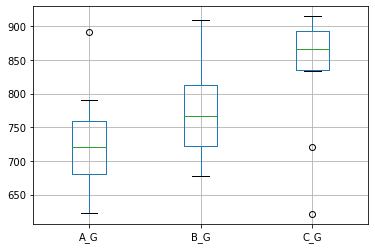

In [19]:
df_anova.boxplot(['A_G','B_G','C_G'])

In [25]:
#ANOVA 실행
f_result = stats.f_oneway(df_anova['A_G'], df_anova['B_G'], df_anova['C_G'])

#ANOVA f값 p값 저장
f, p = f_result.statistic.round(3),f_result.pvalue.round(3)

#ANOVA f값 p값 출력
print('One-way ANOVA')
print('F통계량 : {}'.format(f))
print('p-value : {}'.format(p))    
print('유의수준 0.05에서 p-value가 0.025이므로 마케팅실 그룹별 직원들의 TOEIC 성적에 차이가 있다고 할 수 있다')

One-way ANOVA
F통계량 : 4.263
p-value : 0.025
유의수준 0.05에서 p-value가 0.025이므로 마케팅실 그룹별 직원들의 TOEIC 성적에 차이가 있다고 할 수 있다


### 상관분석

In [27]:
df = pd.read_csv('/home/piai/Downloads/작업시간.csv', engine = 'python')
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


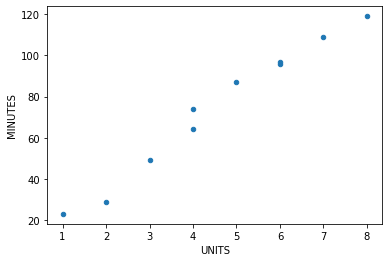

In [28]:
df.plot.scatter(x = 'UNITS', y ='MINUTES') #y는 설명변수 x 는 종속변수

In [29]:
df.corr(method = 'pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.989
MINUTES,0.989,1.000


In [33]:
#correlation Analysis 실행
corr, pval = stats.pearsonr(df['UNITS'], df['MINUTES'])

#correltation, p-value 결과 출력
print('Correlation Analysis')
print('corr: {0:0.3f}'.format(corr))
print('p-value: {0:0.3f}'.format(pval))
print('결론 : 부품수리시간과 부품수간에 "매우 강한 상관성"이 있다고 할 수 있다.')

Correlation Analysis
corr: 0.989
p-value: 0.000
결론 : 부품수리시간과 부품수간에 "매우 강한 상관성"이 있다고 할 수 있다.


### 단순선형회귀

In [62]:
df = pd.read_csv('/home/piai/Downloads/작업시간.csv', engine = 'python')
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


sns.scatterplot(data = df, x = 'UNITS', y = 'MINUTES')
print('양의 상관관계가 매우 강하게 보임')

In [63]:
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

formula = 'MINUTES~UNITS'
model = smf.ols(formula, data = df)
result = model.fit()
print(result.summary())
print('회귀식은 MINUTES = 7.1712 + 14.6802 UNITS')
print('설명력은 R-Sq = 97.9%이다. 영향을 준다')

#durbin - watcon은 4에가까이 가면 음의 자기상관성. 2에 가까이가면 ,

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           5.82e-08
Time:                        16:55:31   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1712      3.886      1.845      0.1

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 단순선형회귀 2

In [57]:
df = pd.read_csv('/home/piai/test/Daily/csv/직무능력평가.csv', engine = 'python')
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [58]:
#선형회귀모델
from sklearn.linear_model import LinearRegression
#선형모델 formula
import statsmodels.formula.api as smf

In [59]:
#linear regression 실행
model = smf.ols(formula = 'EVAL ~ DISSATIS', data = df)
result = model.fit()

In [60]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.86
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.99e-08
Time:                        16:54:55   Log-Likelihood:                -99.882
No. Observations:                  30   AIC:                             203.8
Df Residuals:                      28   BIC:                             206.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3763      6.620      2.172      0.0

결론 : 회귀식은 EVAL = 14.38 + 0.75 * DISSATIS 이며  
설명력은 R-sq = 68.1%이다.  
Durbin-Watson이 2.245로 2에 가깝기에 자기상관이 없다.  
그러나 Omnibus 확률이 0.024로 0.05보다 작기때문에 정규성이 없다는 것을 의미한다.  
따라서 위의 모델은 적합히지 않으며 데이터를 추가하거나 이상치에 대한 조치가 필요해 보인다.  
